In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('C:/Users/nezim/PycharmProjects/percentile_calculator/percentile_results/data_set_percentiles_2.csv')

In [45]:
df.head()

,MPs,nilrefilter_Redcomponent_percentile50th,nilre_filter_Red_component_percentile_90th,nilre_filter_Green_component_percentile_50th,nilre_filter_Green_ component_percentile_90th,nilre_filter_Blue_component_percentile_50th,nilre_filter_ Blue_ component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Red_ component_percentile_90th,DAPI_filter_Green_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_Blue_component_percentile_50th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_Red_component_percentile_50th,FITC_filter_ Red_ component_percentile_90th,FITC_filter_Green_component_percentile_50th,FITC_filter_ Green_ component_percentile_90th,FITC_filter_Blue_component_percentile_50th,FITC_filter_ Blue_ component_percentile_90th
0,OM,3,10,0,0,0,0,6,14,11,20,17,19,0,0,0,0,0,0
1,PA,102,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PA6,4,4,0,0,0,0,0,1,39,41,61,65,0,0,0,0,0,0
3,PE,42,70,0,0,0,0,0,0,0,0,0,0,0,0,187,220,29,34
4,PE100,64,74,0,0,0,0,0,0,0,0,0,0,0,0,186,195,29,30


In [46]:
explicativas = df.iloc[:,1:17]
objetivo = df.MPs

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(max_depth=4)

In [49]:
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=4)

In [50]:
#visualizar
from sklearn.tree import plot_tree

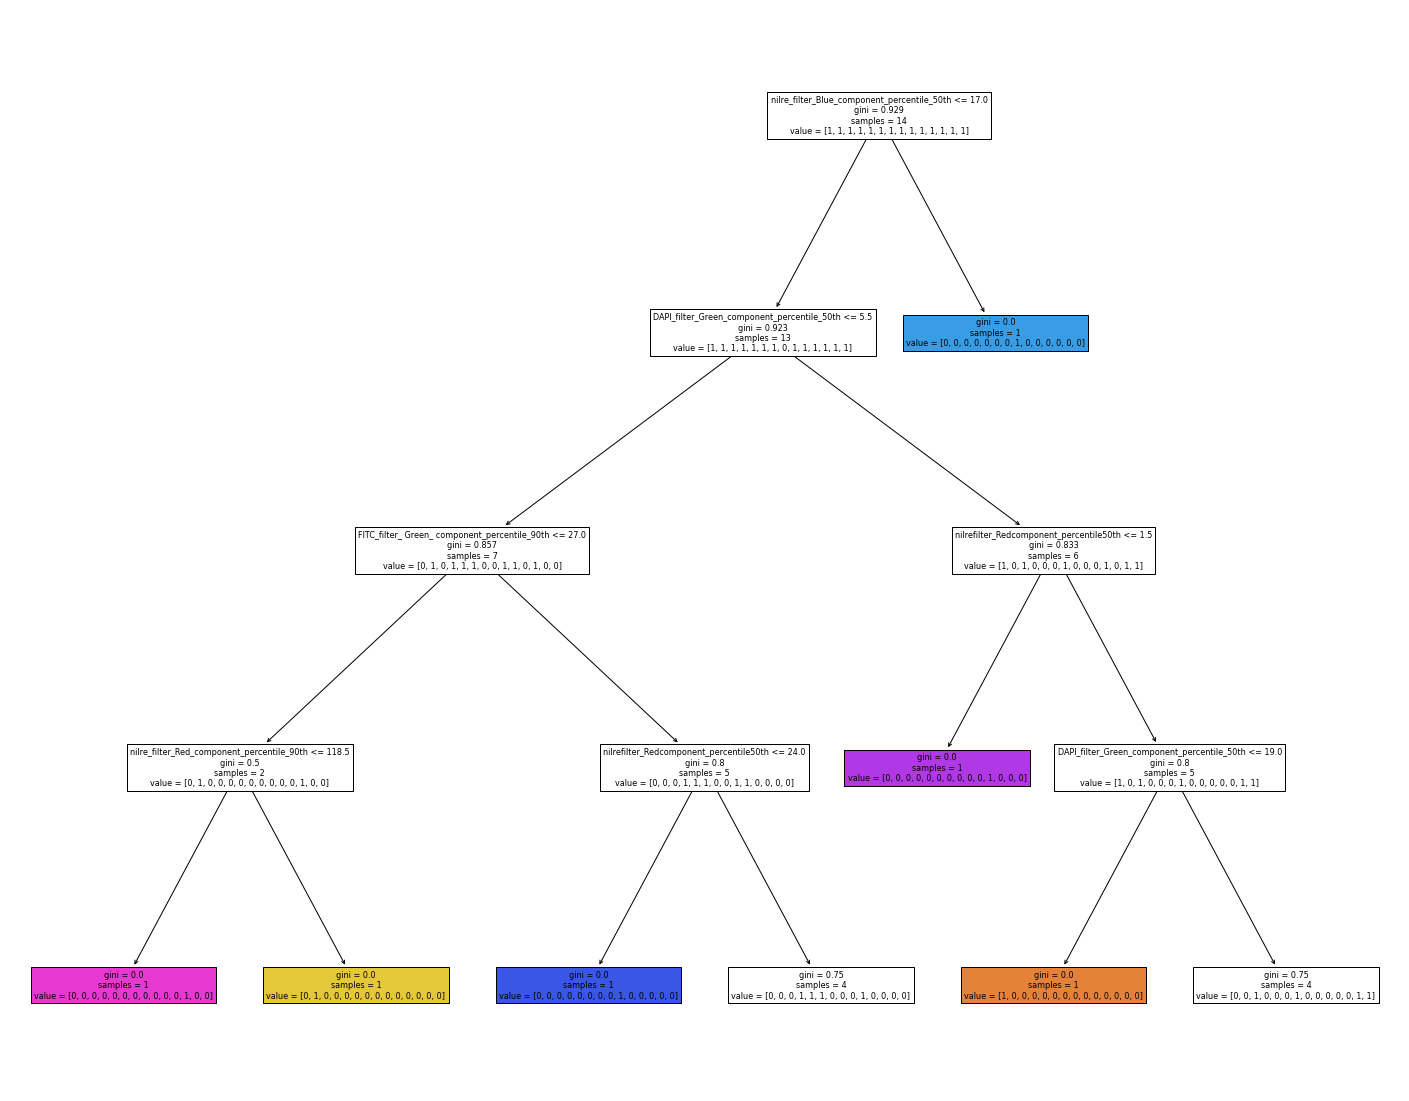

In [51]:
fig =plt.figure(figsize=(25,20))
plot_tree(decision_tree= model, feature_names=explicativas.columns, filled=True);

In [52]:
#calcular prediccion
a= explicativas.sample()

In [53]:
a

,nilrefilter_Redcomponent_percentile50th,nilre_filter_Red_component_percentile_90th,nilre_filter_Green_component_percentile_50th,nilre_filter_Green_ component_percentile_90th,nilre_filter_Blue_component_percentile_50th,nilre_filter_ Blue_ component_percentile_90th,DAPI_filter_Red_component_percentile_50th,DAPI_filter_ Red_ component_percentile_90th,DAPI_filter_Green_component_percentile_50th,DAPI_filter_ Green_ component_percentile_90th,DAPI_filter_Blue_component_percentile_50th,DAPI_filter_ Blue_ component_percentile_90th,FITC_filter_Red_component_percentile_50th,FITC_filter_ Red_ component_percentile_90th,FITC_filter_Green_component_percentile_50th,FITC_filter_ Green_ component_percentile_90th
10,6,6,0,0,0,0,0,0,0,0,0,0,0,1,162,190


In [54]:
fig.savefig("micro.png")

In [55]:
model.predict_proba(a)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [56]:
y_pred=model.predict(explicativas)
y_pred

array(['OM', 'PA', 'PA6', 'PE', 'PE', 'PE', 'PA6', 'PA6', 'PA6', 'PP',
       'PP1', 'PE', 'PVC', 'PSf'], dtype=object)

In [57]:
#interpretar modelo

In [58]:
import seaborn as sns

<AxesSubplot:xlabel='MPs', ylabel='Count'>

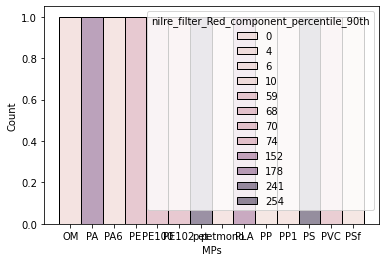

In [60]:
sns.histplot(x=df.MPs, hue=df.nilre_filter_Red_component_percentile_90th) #compara para ver que car es la mas importnate

In [19]:
#que tan bueno es el modelo
df['pred']= y_pred

In [20]:
df.sample(10)[['MPs','pred']]

,MPs,pred
7,petmono,PA6
12,PVC,PVC
8,PLA,PLA
13,PSf,PSf
9,PP,PP
4,PE100,PE
10,PP1,PE
2,PA6,PA6
3,PE,PE
6,pet,PA6


In [21]:
df['MPs'] == df['pred']

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8      True
9      True
10    False
11     True
12     True
13     True
dtype: bool

In [22]:
(df['MPs'] == df['pred']).mean()

0.6428571428571429